In [73]:
import wandb

wandb.login()

# Initialize API
api = wandb.Api()

# Specify the entity, project, and run ID
entity = "hrishabh-university-of-pennsylvania"      
project = "PINN-Stokes" 

# List all runs in the project
runs = api.runs(f"{entity}/{project}")

# Print run IDs and names
for run in runs:
    print(f"Run ID: {run.id}, Name: {run.name}")


True
True
True
True
Run ID: aiqowlso, Name: default
Run ID: mzie34mf, Name: default_tanh
Run ID: uyn16z80, Name: default_hl_dim64
Run ID: iphjhu0t, Name: default_rwf_stddev02


In [79]:
# Download run history

import os

output_folder = "./data"

run_id = "iphjhu0t"           # change

# Fetch the run
run = api.run(f"{entity}/{project}/{run_id}")

# Download the history
history = run.history()

filename = "default_rwf_stddev02.csv"      # change
output_path = output_folder + "/" + filename

# Save to a CSV file
history.to_csv(f"{output_path}", index=False)

print("Run history downloaded successfully.")


Run history downloaded successfully.


In [80]:
import pandas as pd

# Load the CSV file

data = pd.read_csv(output_path)

# Display the first few rows of the data
data.head()

,rc_weight,u_in_loss,v_noslip_weight,u_noslip_loss,v_in_loss,_step,rc_loss,v_out_weight,v_in_weight,v_error,...,ru_weight,v_noslip_loss,u_error,v_out_loss,u_in_weight,ru_loss,rv_loss,U_error,rv_weight,_timestamp
0,1.331044,1.096245,1.97983,0.151225,0.150010,0,0.647190,5.113292,1.817399,2.619641,...,0.924829,0.172184,0.939678,0.026341,1.154283,15.025743,13.843382,0.705822,0.925804,1.734686e+09
1,1.331044,0.047350,1.97983,0.032237,0.000354,100,0.012896,5.113292,1.817399,1.057595,...,0.924829,0.001369,0.807779,0.000253,1.154283,0.098000,0.046112,0.802759,0.925804,1.734686e+09
2,1.331044,0.011120,1.97983,0.012033,0.000112,200,0.016046,5.113292,1.817399,1.026881,...,0.924829,0.000596,0.863106,0.000086,1.154283,0.058158,0.022014,0.859073,0.925804,1.734686e+09
3,1.331044,0.005654,1.97983,0.007014,0.000170,300,0.018054,5.113292,1.817399,1.014305,...,0.924829,0.000396,0.902981,0.000038,1.154283,0.032470,0.011606,0.898304,0.925804,1.734686e+09
4,1.331044,0.003413,1.97983,0.005370,0.000218,400,0.014864,5.113292,1.817399,1.010520,...,0.924829,0.000380,0.930918,0.000021,1.154283,0.021805,0.007414,0.924201,0.925804,1.734686e+09


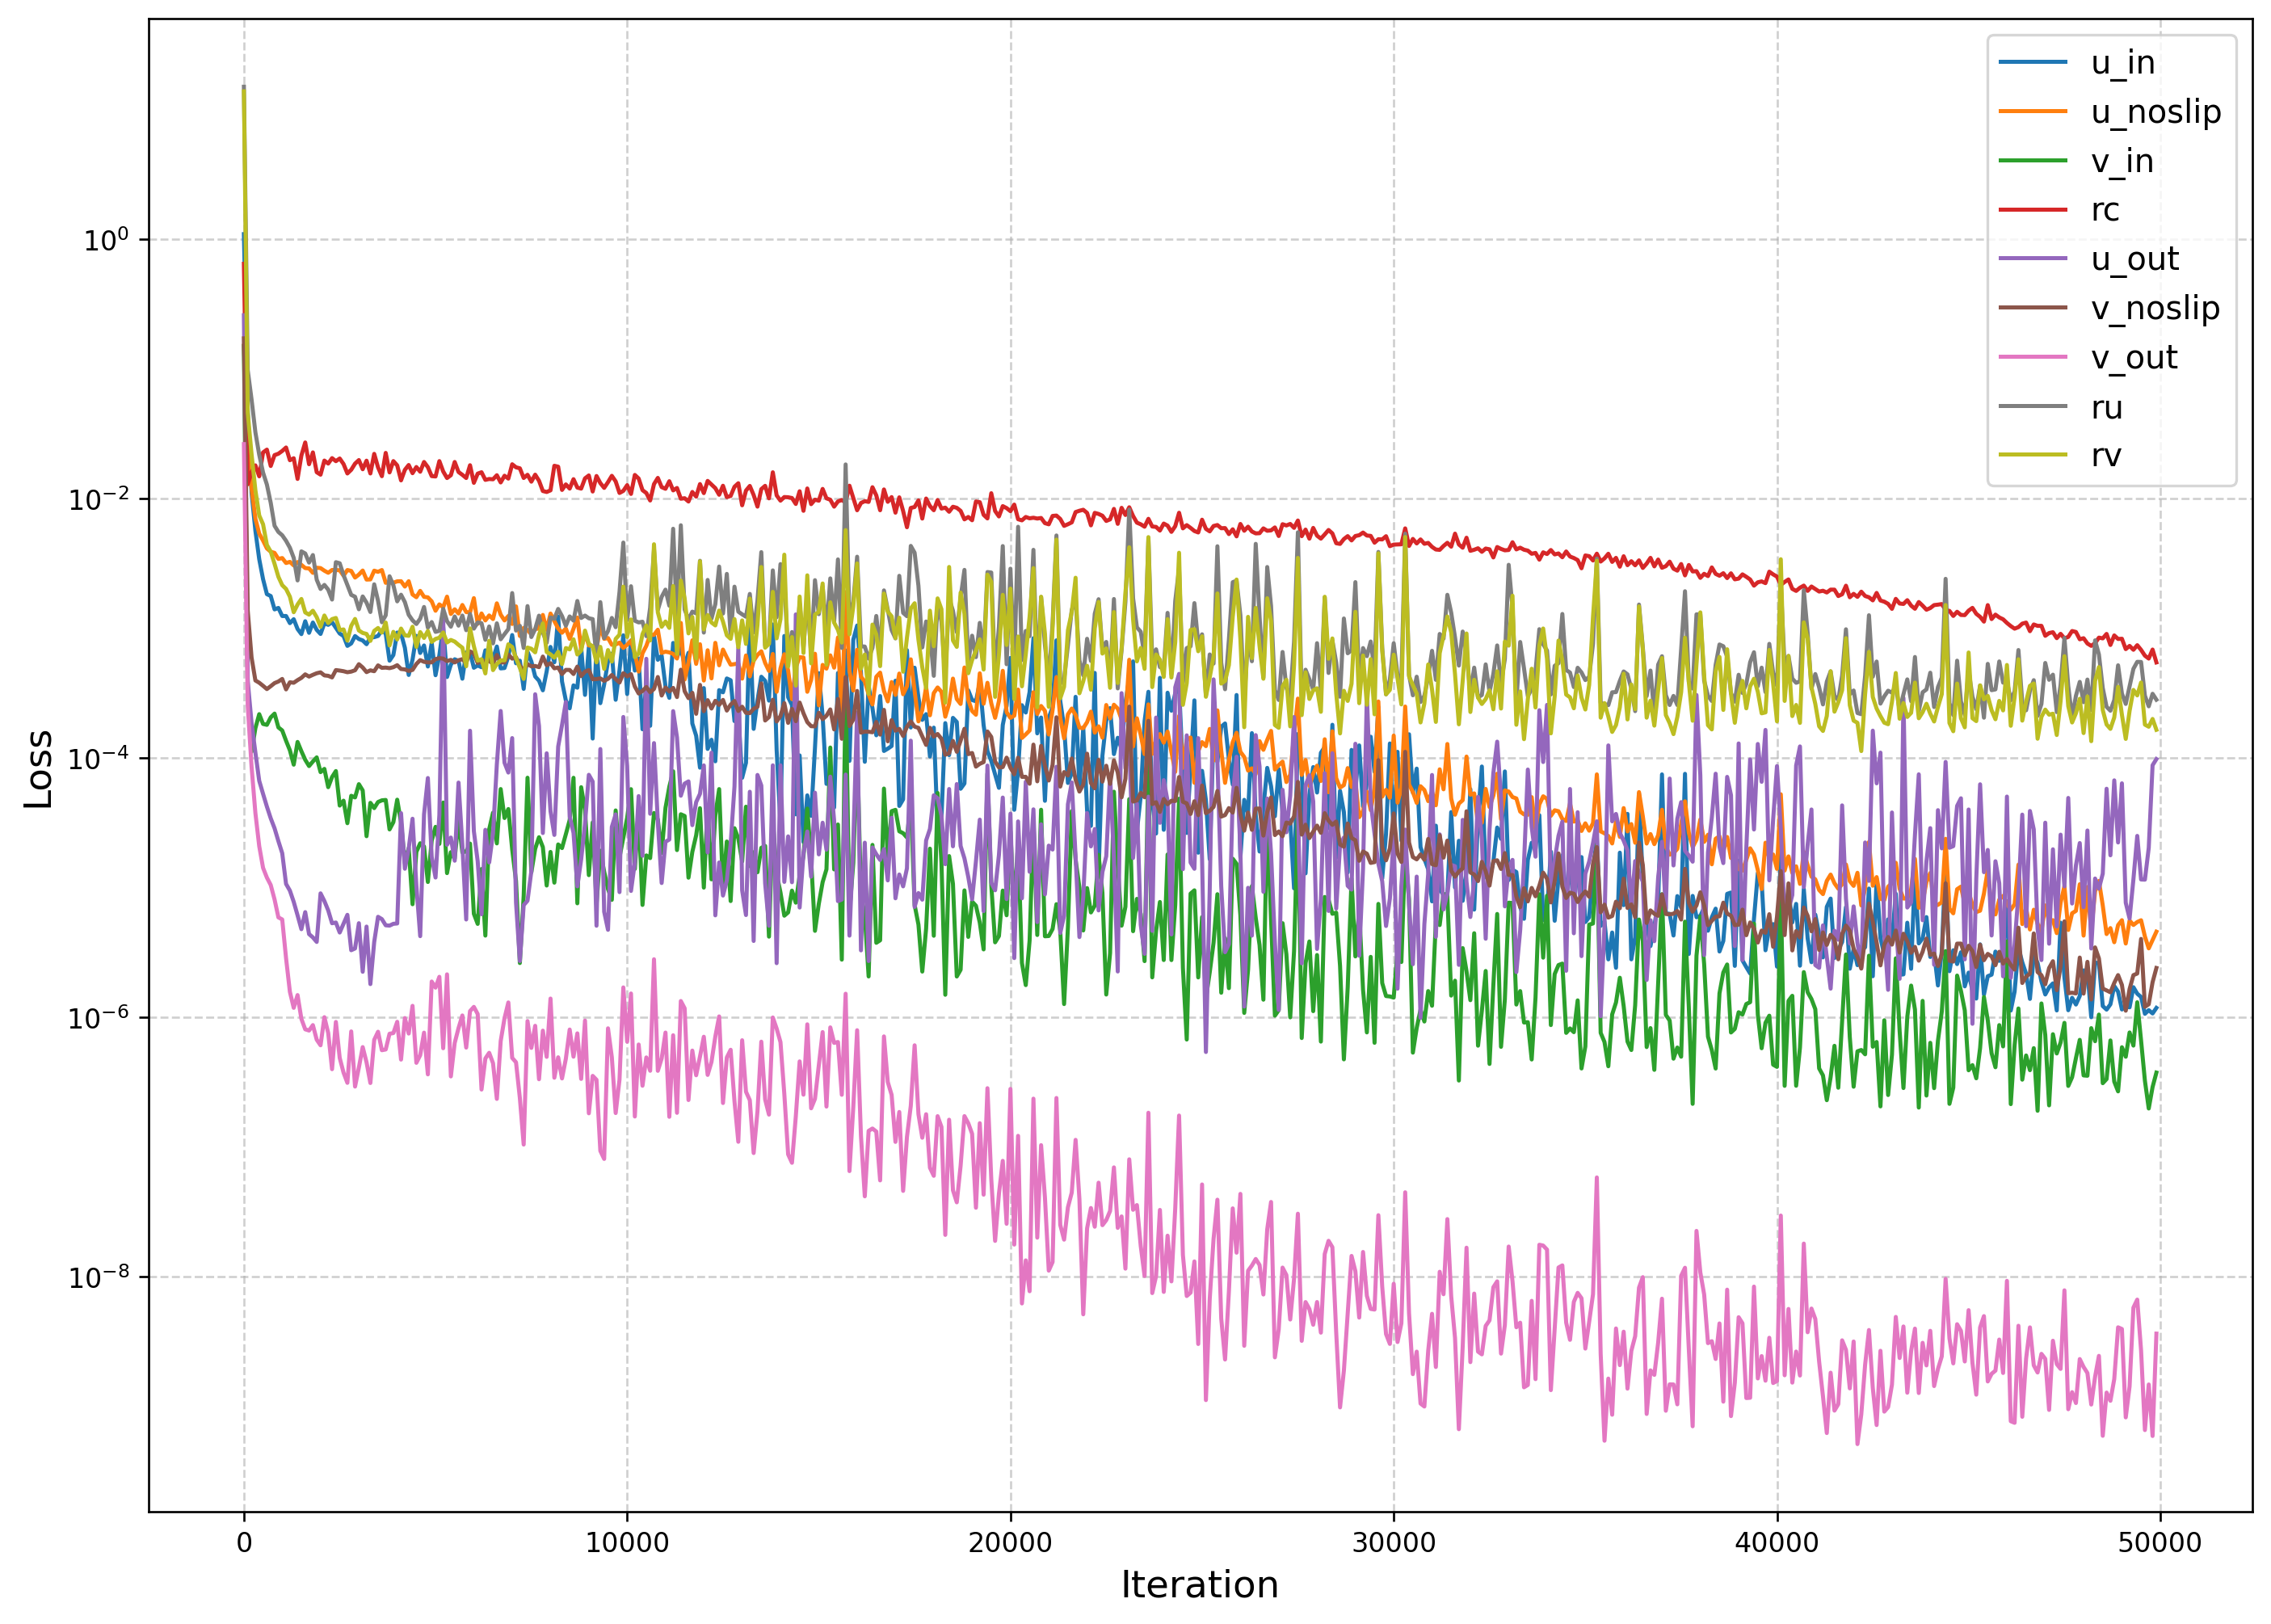

In [81]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

import os

# Define the path for saving figures
figures_path = "./figures"

# Create the directory if it doesn't exist
os.makedirs(figures_path, exist_ok=True)

# Save the plot to the specified path
plt.figure(figsize=(14, 10), dpi=240)

# Plot each loss with a cleaned legend label
for col in loss_columns:
    cleaned_label = col.replace('_loss', '')
    plt.plot(timesteps, np.log10(data[col]), label=cleaned_label)

# Customize the plot
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Format y-axis ticks as 10^() type
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"$10^{{{int(y)}}}$"))

plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Save the figure
output_file = os.path.join(figures_path, "loss_plot.png")
plt.savefig(output_file, bbox_inches='tight')
plt.show()


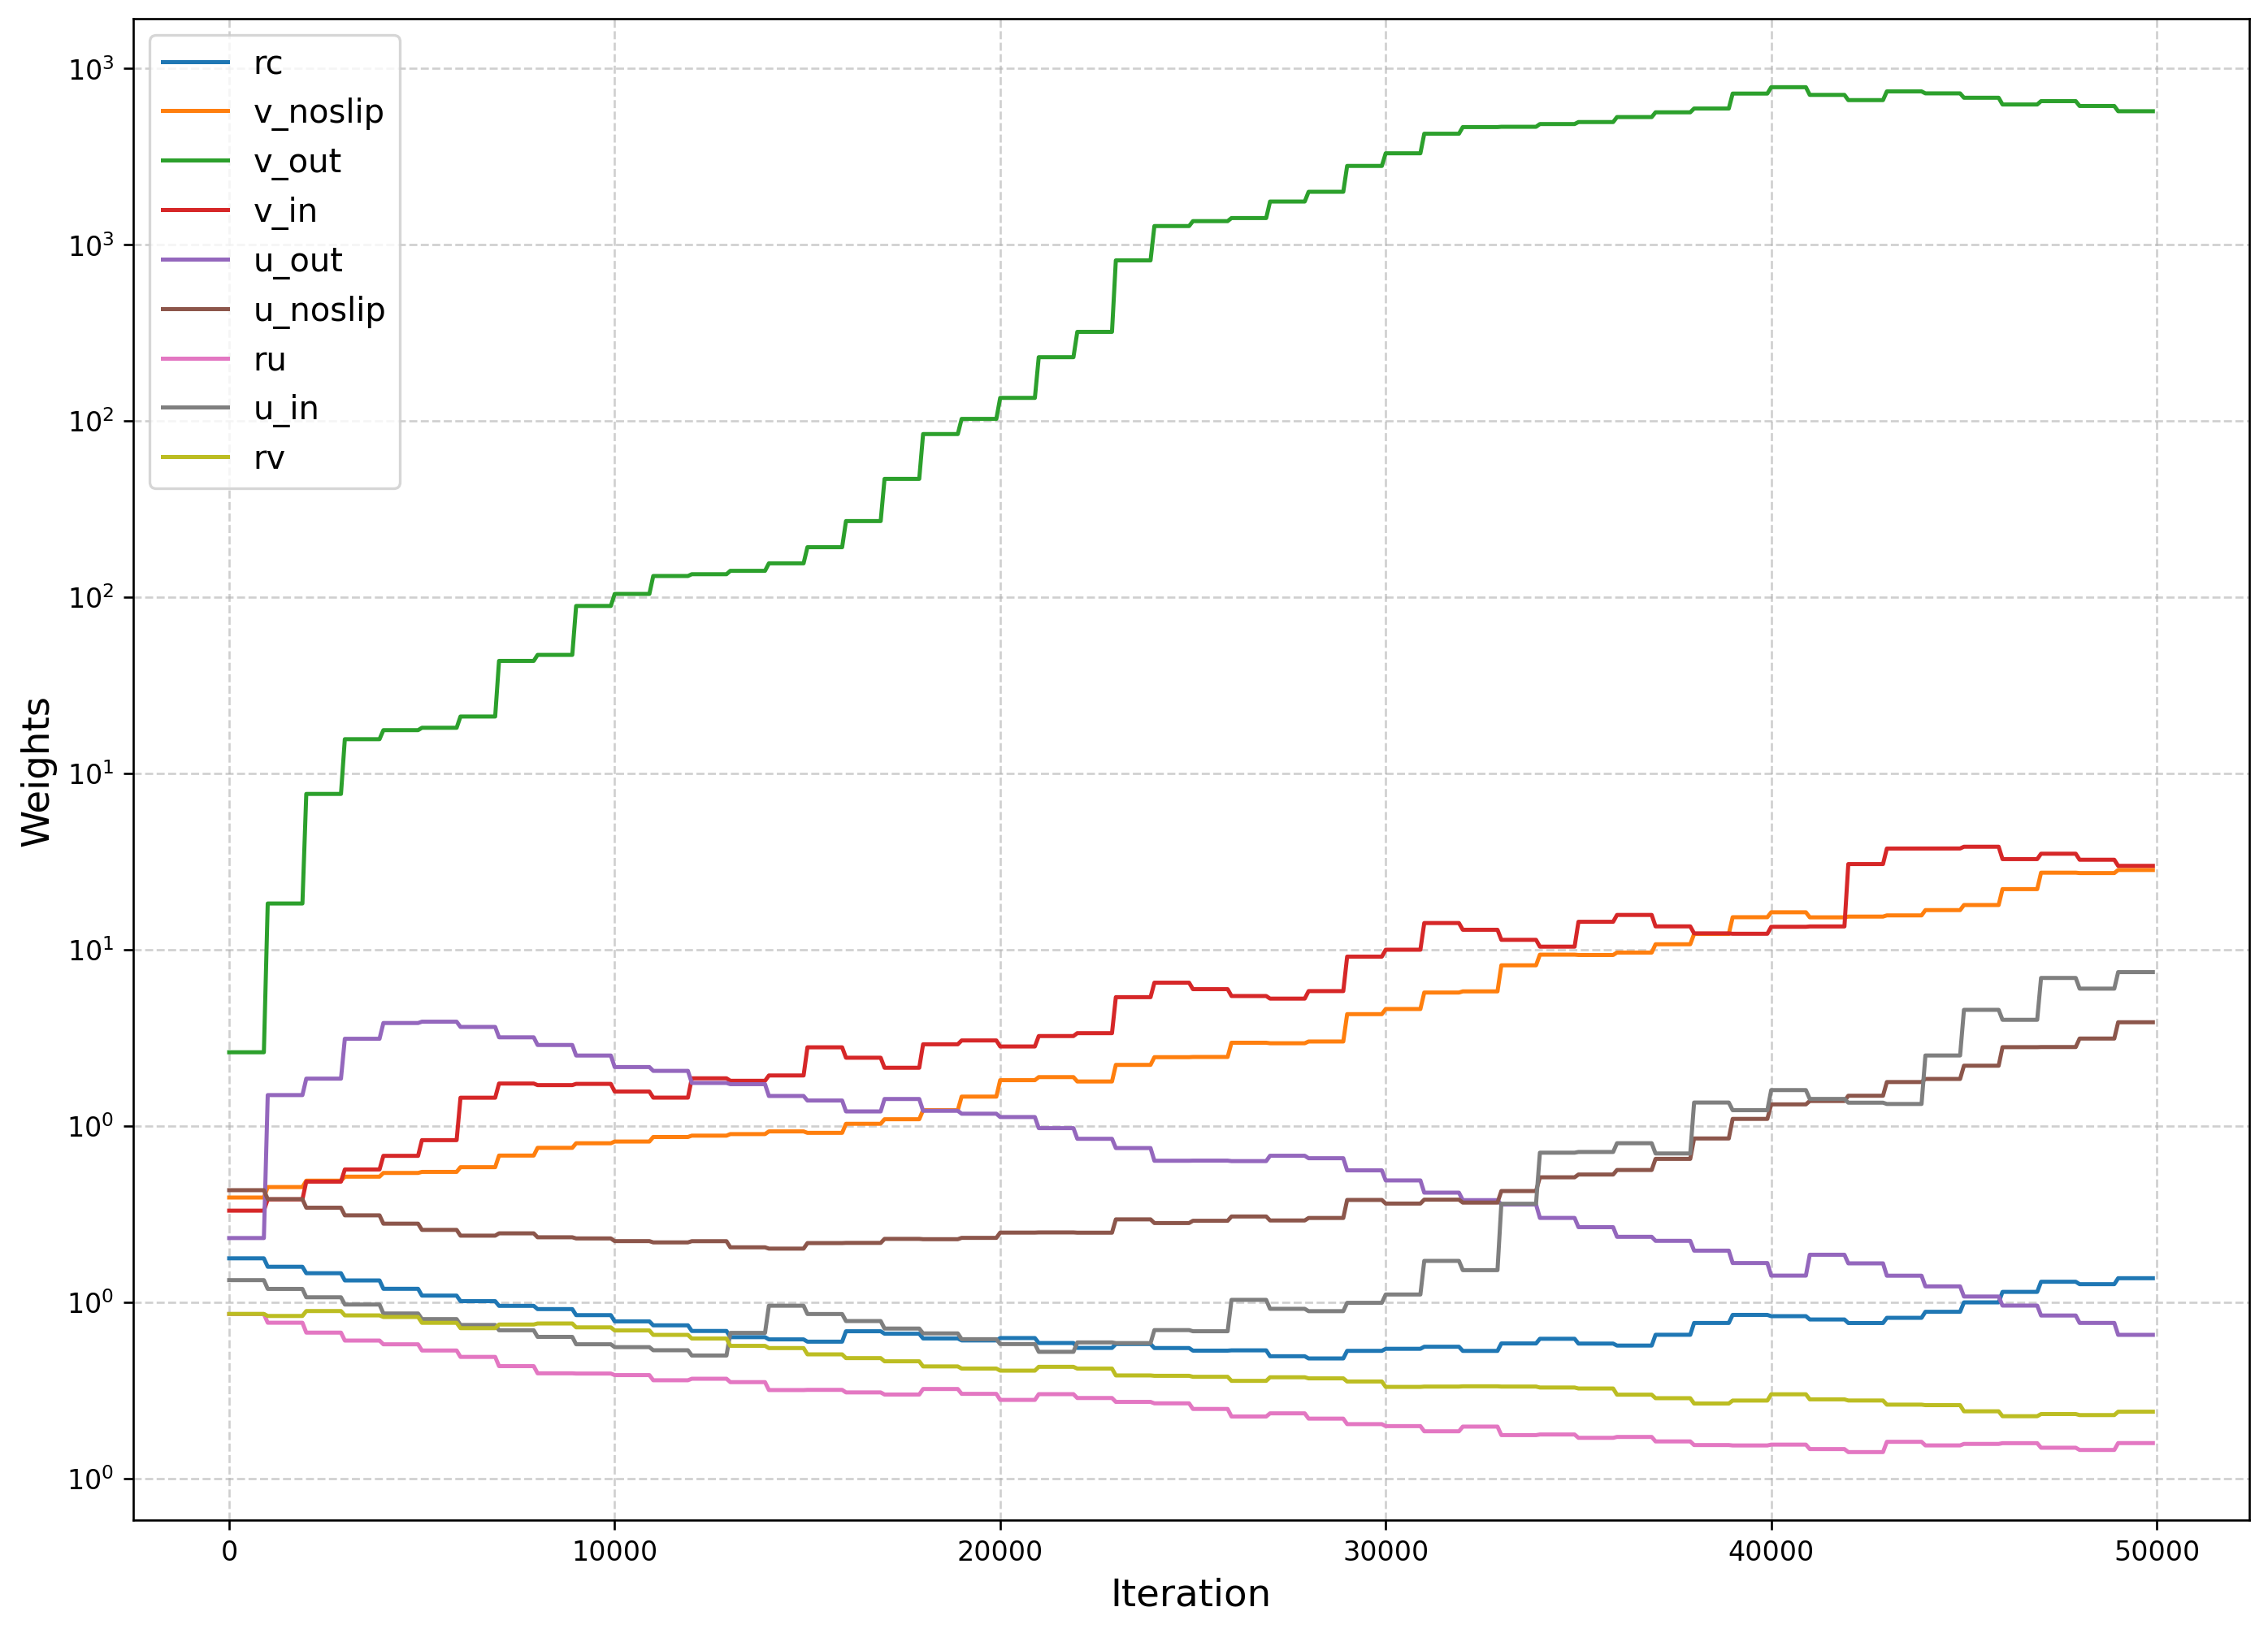

In [82]:
# Create the plot for weights with log10 y-axis and updated filename
plt.figure(figsize=(14, 10), dpi=240)

# Plot each weight with a cleaned legend label
for col in weight_columns:
    cleaned_label = col.replace('_weight', '')
    plt.plot(timesteps, np.log10(data[col]), label=cleaned_label)

# Customize the plot
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Weights', fontsize=14)

# Format y-axis ticks as 10^() type
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"$10^{{{int(y)}}}$"))

# Add legend and grid
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Save the figure with the correct filename
output_file_weights_final = os.path.join(figures_path, "weights_plot.png")
plt.savefig(output_file_weights_final, bbox_inches='tight')
plt.show()


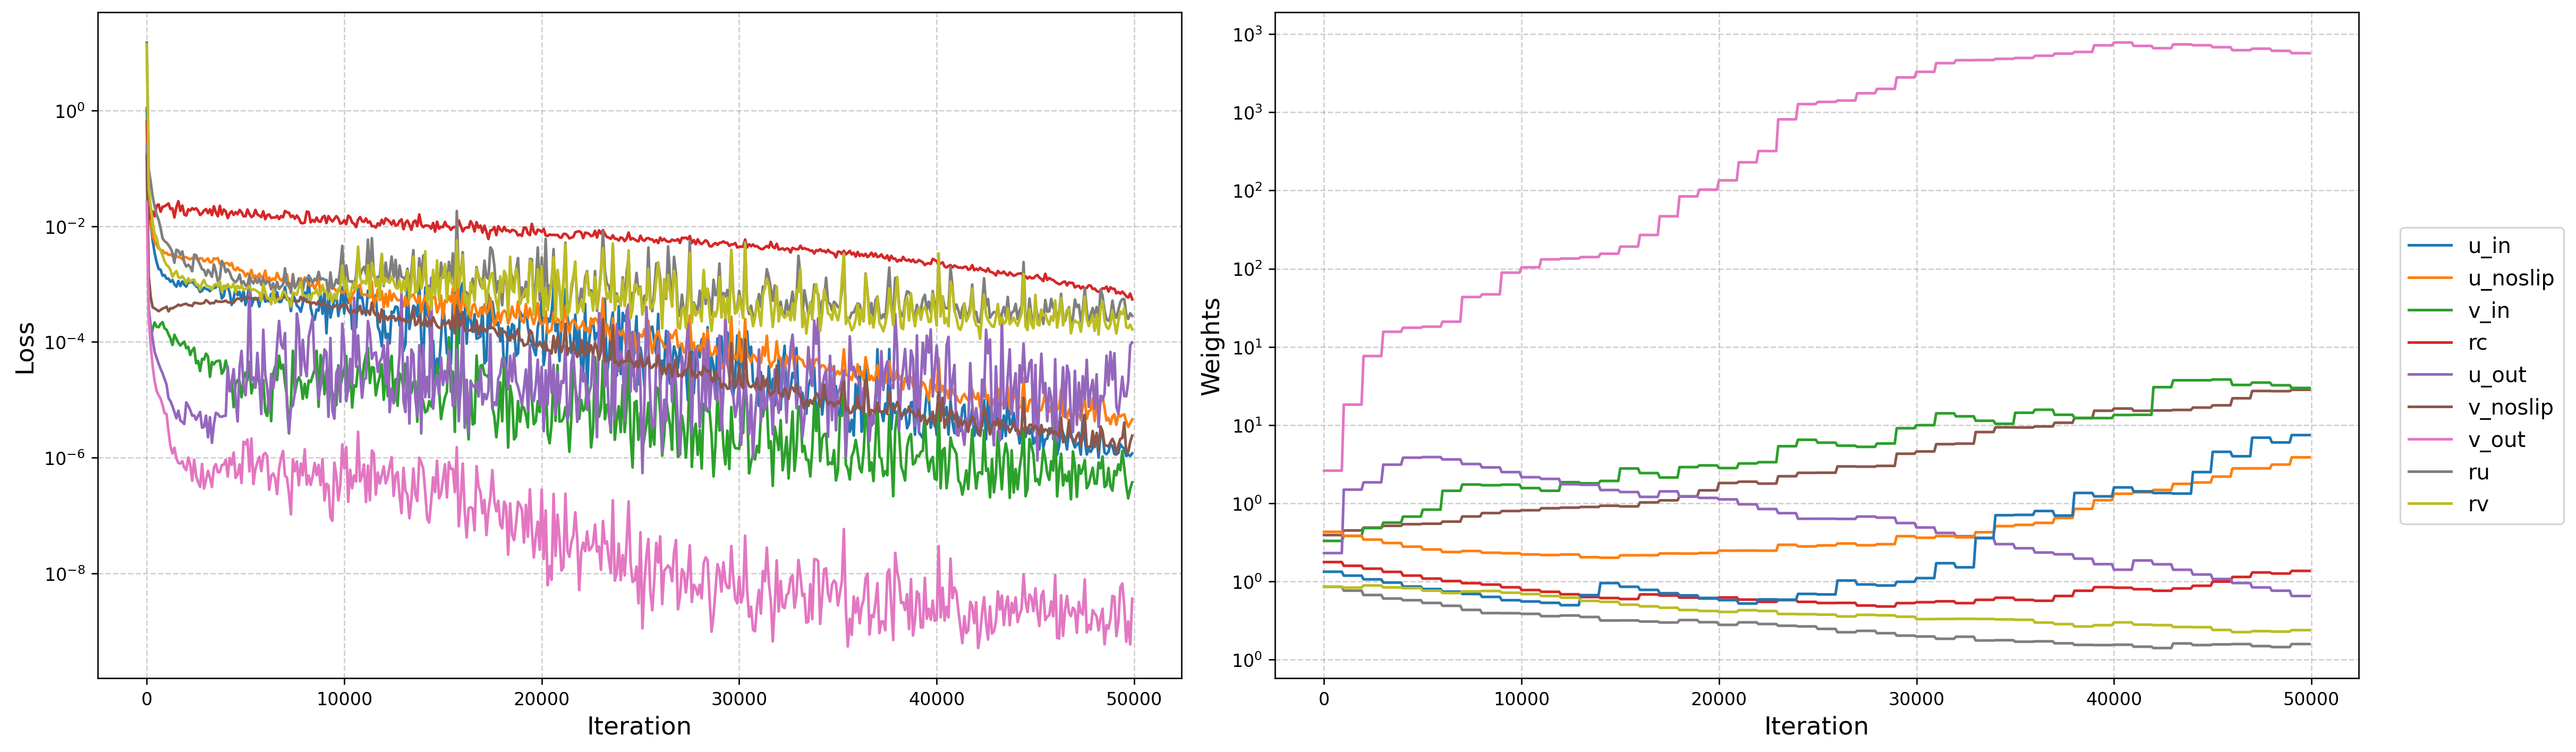

In [83]:
# Create a side-by-side subplot with losses on the left and weights on the right
fig, axes = plt.subplots(1, 2, figsize=(22, 6), dpi=240, sharey=False)

# Define color map for consistent plotting
color_map = plt.cm.tab10.colors

# Create a dictionary to track plotted variables
plotted_vars = {}

# Plot losses on the first axis (left)
for col in loss_columns:
    cleaned_label = col.replace('_loss', '')
    if cleaned_label not in plotted_vars:
        plotted_vars[cleaned_label] = color_map[len(plotted_vars) % len(color_map)]
    axes[0].plot(timesteps, np.log10(data[col]), label=cleaned_label, color=plotted_vars[cleaned_label])

# Customize the first axis (losses)
axes[0].set_xlabel('Iteration', fontsize=14)
axes[0].set_ylabel('Loss', fontsize=14)
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"$10^{{{int(y)}}}$"))
axes[0].grid(True, linestyle='--', alpha=0.6)

# Plot weights on the second axis (right) using the same color scheme
for col in weight_columns:
    cleaned_label = col.replace('_weight', '')
    if cleaned_label in plotted_vars:
        axes[1].plot(timesteps, np.log10(data[col]), label=cleaned_label, color=plotted_vars[cleaned_label])

# Customize the second axis (weights)
axes[1].set_xlabel('Iteration', fontsize=14)
axes[1].set_ylabel('Weights', fontsize=14)
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f"$10^{{{int(y)}}}$"))
axes[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout and add a common legend within the figure
fig.tight_layout(rect=[0, 0, 0.85, 1])
fig.legend(plotted_vars.keys(), loc='center right', fontsize=12, bbox_to_anchor=(0.92, 0.5))

# Save the figure
output_file_combined_final_left = os.path.join(figures_path, "weights_losses_plot.png")
plt.savefig(output_file_combined_final_left, bbox_inches='tight')
plt.show()
